In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
# Read in the LAX temperature data
filepath = "~/Documents/PythonProjects/DataBootcamp/Lesson_15/lax_temperature.csv"
lax_df = pd.read_csv(filepath)
lax_df.head()

,STATION,DATE,REPORT_TYPE,HourlyDryBulbTemperature (C)
0,72295023174,2019-01-01T00:49:00,FM-16,11.1
1,72295023174,2019-01-01T00:53:00,FM-15,10.6
2,72295023174,2019-01-01T01:53:00,FM-15,11.1
3,72295023174,2019-01-01T02:53:00,FM-15,9.4
4,72295023174,2019-01-01T03:53:00,FM-15,6.1


In [8]:
# Demonstrate calculating measures of central tendency
#Mean
mean_temp = np.mean(lax_df["HourlyDryBulbTemperature (C)"])
print(f'The mean temperature at the LAX airport is {round((mean_temp), 2)}')

#Median
median_temp = np.median(lax_df["HourlyDryBulbTemperature (C)"])
print(f'The median temperature at the LAX airport is {median_temp}')

#Mode
mode_temp = st.mode(lax_df["HourlyDryBulbTemperature (C)"], keepdims=False)
print(f'The mode temperature at the LAX airport is {mode_temp[0]}')

The mean temperature at the LAX airport is 14.25
The median temperature at the LAX airport is 13.9
The mode temperature at the LAX airport is 13.9


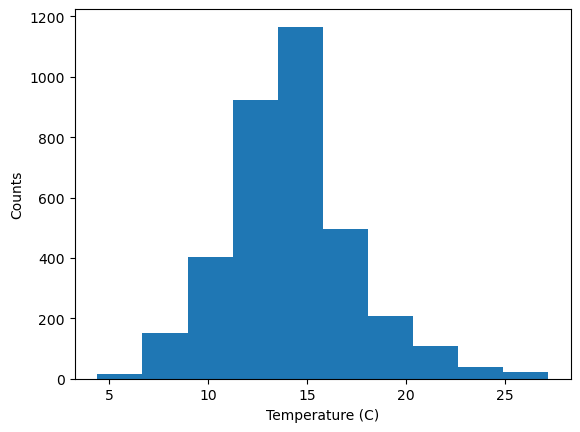

In [17]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(lax_df["HourlyDryBulbTemperature (C)"])
plt.xlabel("Temperature (C)")
plt.ylabel("Counts")
plt.show()

In [19]:
# Run the normality test on the whole temperatures DataFrame.
# The null hypothesis is that the sample comes from a normal distribution
# If p-value < alpha, the null hypothesis can be rejected
alpha = 0.05
normaltest = st.normaltest(lax_df["HourlyDryBulbTemperature (C)"])
p = normaltest[1]

if p < alpha:
    print(f'The p-value is {p} and the null hypothesis can be rejected; the sample does not come from a normal distribution')
else:
    print(f'The p-value is {p} and the null hypothesis cannot be rejected; the sample does come from a normal distribution')

The p-value is 5.841834570721464e-45 and the null hypothesis can be rejected; the sample does not come from a normal distribution


In [22]:
# Demonstrate calculating the variance and standard deviation using the different modules
#Variance
variance = np.var(lax_df["HourlyDryBulbTemperature (C)"])
print(f'The population variance using the NumPy module is {round(variance, 2)}.')

#Standard Deviation
sd = np.std(lax_df["HourlyDryBulbTemperature (C)"])
print(f'The population standard deviation using the NumPy module is {round(sd, 2)}.')

The population variance using the NumPy module is 9.99
The population standard deviation using the NumPy module is 3.16


In [25]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f'Roughly 68% of the data is between {round((mean_temp-sd),2)} and {round((mean_temp+sd), 2)}.')
print(f'Roughly 95% of the data is between {round((mean_temp-(2*sd)),2)} and {round((mean_temp+(2*sd)), 2)}.')
print(f'Roughly 99.7% of the data is between {round((mean_temp-(3*sd)),2)} and {round((mean_temp+(3*sd)), 2)}.')

Roughly 68% of the data is between 11.09 and 17.41.
Roughly 95% of the data is between 7.93 and 20.57.
Roughly 99.7% of the data is between 4.77 and 23.73.


In [26]:
# Demonstrate calculating the z-scores using SciPy
z_scores = st.zscore(lax_df["HourlyDryBulbTemperature (C)"])
print(f'The z-scores using the SciPy module are: {z_scores}')

The z-scores using the SciPy module are: 0      -0.997612
1      -1.155842
2      -0.997612
3      -1.535596
4      -2.579919
          ...   
3524    0.426465
3525    0.236588
3526    0.046711
3527    0.046711
3528    0.046711
Name: HourlyDryBulbTemperature (C), Length: 3529, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

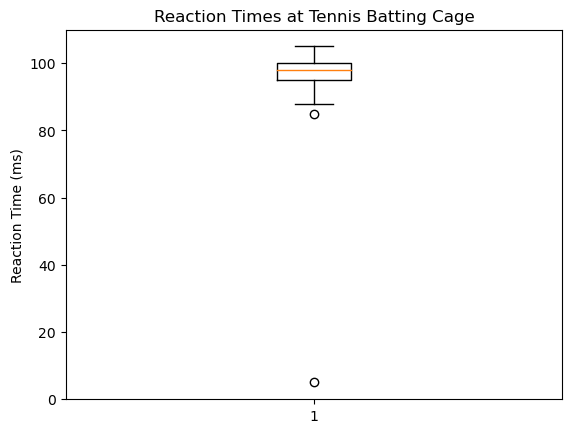

In [31]:
# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]

plt.boxplot(times)
plt.title("Reaction Times at Tennis Batting Cage")
plt.ylabel("Reaction Time (ms)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

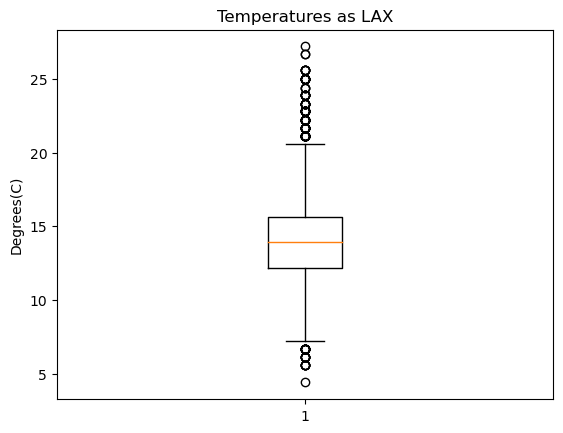

In [32]:
#Create a boxplot of the LAX temperature data
plt.boxplot(lax_df["HourlyDryBulbTemperature (C)"])
plt.title("Temperatures as LAX")
plt.ylabel("Degrees(C)")
plt.show()

In [43]:
#Evaluate the quantiles of the LAX temperature data
quartiles = np.percentile(lax_df["HourlyDryBulbTemperature (C)"], [25, 50, 75])
q1 = quartiles[0]
q2 = quartiles[1]
q3 = quartiles[2]
iqr = q3-q1

print(f'The lower quartile of the temperatures is: {q1}.')
print(f'The upper quartile of the temperatures is: {q3}.')
print(f'The interquartile range of the temperatures is: {iqr}.')
print(f'The median of the temperatures is: {q2}.')
print(f'Values below {q1-(1.5*iqr)} could be outliers.')
print(f'Values above {q3+(1.5*iqr)} could be outliers.')


The lower quartile of the temperatures is: 12.2.
The upper quartile of the temperatures is: 15.6.
The interquartile range of the temperatures is: 3.4000000000000004.
The median of the temperatures is: 13.9.
Values below 7.099999999999999 could be outliers.
Values above 20.7 could be outliers.
